In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine

In [5]:
df = load_wine(as_frame=True)['data']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
# Preprocessing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns = df.columns)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)
X_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
158,1.654492,-0.589180,1.218995,1.653086,-0.122282,0.808997,-0.722123,1.354888,1.943238,3.435432,-1.699872,-0.920468,-0.276711
137,-0.581338,2.848870,0.999674,1.653086,-0.262708,-0.809357,-1.434939,2.160669,-0.860096,-0.025128,-0.603037,-1.301828,-0.738463
98,-0.778980,-1.136754,-0.974210,-0.298767,-0.824415,1.962676,1.727556,-0.981875,0.629175,-0.241413,0.362177,0.223610,-0.276711
159,0.592164,-0.598156,0.999674,0.902373,-0.754202,0.488531,-0.932956,1.274310,1.224884,2.894719,-1.699872,-1.174708,-0.404091
38,0.085705,-0.750759,-0.974210,-1.199622,-0.122282,0.168065,0.613153,-0.659563,-0.387033,-0.587469,0.976405,0.110615,0.869707


In [11]:
# Removing duplicate columns
print(df.T.duplicated())
df = df.T.drop_duplicates().T

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool


In [12]:
# Variance Threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)

In [13]:
sel.fit(df)

VarianceThreshold(threshold=0.05)

In [ ]:
sel.get_support() # Returns true if the variance of feature is more than threshold

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

---

<Axes: >

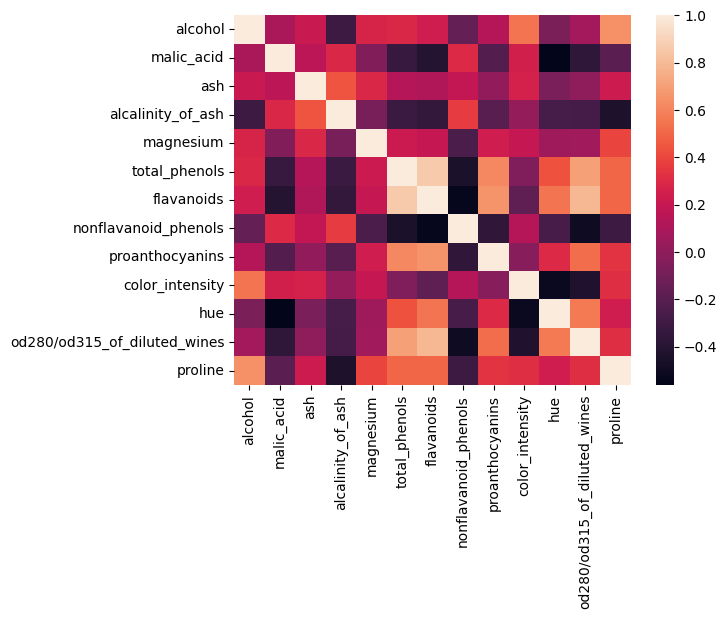

In [16]:
# Correlation
import seaborn as sns
sns.heatmap(df.corr())

In [22]:
# There is no direct method in sklearn to perform the feature selection using Correlation
corr_matrix = df.corr()

columns_to_drop = []

for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        if corr_matrix.iloc[i, j] > 0.95:
            columns_to_drop.append(corr_matrix.columns[i])

columns_to_drop

[]

---

In [40]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sex'] = encoder.fit_transform(df['sex'])
df['class'] = encoder.fit_transform(df['class'])
df['embarked'] = encoder.fit_transform(df['embarked'])
df['who'] = encoder.fit_transform(df['who'])
df['adult_male'] = encoder.fit_transform(df['adult_male'])

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k=3)  # Select top 3 features
chi2_selector.fit(df.loc[:, ['sex', 'class', 'embarked', 'who', 'adult_male']], df['alive'])

# Get feature scores and p-values
scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Create a dataframe of features and their scores
feature_scores = pd.DataFrame({
    'Feature': ['sex', 'class', 'embarked', 'who', 'adult_male'],
    'Score': scores,
    'P Value': p_values
})

print("Chi-Square Feature Scores:")
print(feature_scores.sort_values('Score', ascending=False))

Chi-Square Feature Scores:
      Feature       Score       P Value
4  adult_male  109.859713  1.051769e-25
0         sex   92.702447  6.077838e-22
1       class   54.465866  1.581715e-13
3         who   27.543638  1.535897e-07
2    embarked    9.755456  1.787913e-03


In [ ]:
chi2_selector.get_support()
# The p-value of all the column are less than 0.05 but we are selecting top 3 features having lowest p-values

array([ True,  True, False, False,  True])

---